Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:
Ananya Gandhi, no collaborators

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# HW 6:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Techniques for Systems of ODEs

Consider the system of ODEs

$$\begin{aligned}
v'''(t) &= t^2 v v'' - v w' \\
w''(t) &= t w w' + 4 v'
\end{aligned}$$
with 
$$
    v(0) = 1, v'(0) = \frac{1}{4}, v''(0) = \frac{1}{3}, w(0) = \frac{1}{2}, \quad \text{and} \quad w'(0) = 0.
$$

**(a)** (10) Write the system of differential equations as a first-order system of differential equations, $u' = f(x, u)$.

YOUR ANSWER HERE

We start with
$$
    u = \begin{bmatrix}
    v \\
    v' \\
    v'' \\
    w \\
    w'
    \end{bmatrix} = 
    \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 \\
    u_5
    \end{bmatrix}
$$

So we have 
$$
    u' = \begin{bmatrix}
    v' \\
    v'' \\
    v''' \\
    w' \\
    w''
    \end{bmatrix} = 
    \begin{bmatrix}
    u_2 \\
    u_3 \\ 
    x^2 u_1 u_3 - u_1u_5 \\
    u_5 \\
    x u_4 u_5 + 4u_2 
    \end{bmatrix}
$$

This gives us a first order system of differential equations. Our initial value is: 
$$
    u(0) = \begin{bmatrix}
    1 \\
    \frac{1}{4} \\
    \frac{1}{3} \\
    \frac{1}{2} \\
    0
    \end{bmatrix}
$$ 

**(b)** (10) Write code that solves the system using a method we discussed in class that is higher than 2nd order.  Do not use `scipy.integrate`.  Make sure to choose a method that will work for the non-linear right-hand-side.  Integrate the system to time $t_f = 1$ and plot the phase plane solution $(v, w)$.

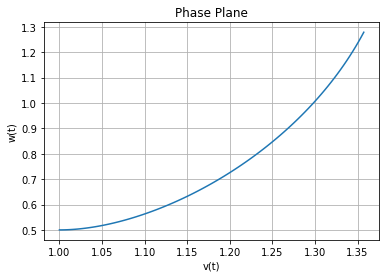

In [2]:
# YOUR CODE HERE
# Use Runge Kutta 4th order method

def rk4(t):

  def f(x, u):
    return numpy.array([u[1], u[2], x**2 * u[0] * u[2] - u[0] * u[4], u[4], x * u[3] * u[4] + 4 * u[1]]) 

  delta_t = t[1] - t[0]
  u_4 = numpy.empty((t.shape[0], 5))
  u_4[0, :] = [1, 1/4, 1/3, 1/2, 0]

  for (n, t_n) in enumerate(t[1:]):
    y_1 = u_4[n]
    y_2 = u_4[n] + 0.5 * delta_t * f(t_n, y_1)
    y_3 = u_4[n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
    y_4 = u_4[n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
    u_4[n+1] = u_4[n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
      

  v = u_4[:, 0]
  w = u_4[:, 3]
  return v, w

t = numpy.linspace(0, 1, 100)
v, w = rk4(t)
plt.plot(v, w)
plt.xlabel("v(t)")
plt.ylabel("w(t)")
plt.title("Phase Plane")
plt.grid()
plt.show()

# raise NotImplementedError() 

**(c)** (5) For systems of non-linear ODEs it is often useful to consider the linearization of the right-hand-side function $f$ and its properties as approximately linear in some region.  The Jacobian matrix $J(f)$ is often used in this context with
$$
    u' \approx J(f) u = A(t,u) u.
$$
This is useful if attempting to use an implicit method as we can evaluate the Jacobian matrix at the current time so that it is not dependent on $U_{n+1}$ and then solve a linear system of equations.

Compute the Jacobian matrix of $f(t, u)$ for the system from part (a).  Recall that the Jacobian matrix is defined as 
$$
    [J(f(t,u))]_{ij} = \frac{\partial}{\partial u_j}  f_i(t, u).
$$

YOUR ANSWER HERE

From the previous problem, we have
$$
    f(t, u) = u' = \begin{bmatrix}
    u_2 \\
    u_3 \\ 
    x^2 u_1 u_3 - u_1u_5 \\
    u_5 \\
    x u_4 u_5 + 4u_2 
    \end{bmatrix}
$$

The Jacobian is defined as:
$$
    J(f(t, u)) = \begin{bmatrix}
    \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} & \frac{\partial f_1}{\partial u_3} & \frac{\partial f_1}{\partial u_4} & \frac{\partial f_1}{\partial u_5} \\
    \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} & \frac{\partial f_2}{\partial u_3} & \frac{\partial f_2}{\partial u_4} & \frac{\partial f_2}{\partial u_5} \\
    \frac{\partial f_3}{\partial u_1} & \frac{\partial f_3}{\partial u_2} & \frac{\partial f_3}{\partial u_3} & \frac{\partial f_3}{\partial u_4} & \frac{\partial f_3}{\partial u_5} \\
    \frac{\partial f_4}{\partial u_1} & \frac{\partial f_4}{\partial u_2} & \frac{\partial f_4}{\partial u_3} & \frac{\partial f_4}{\partial u_4} & \frac{\partial f_4}{\partial u_5} \\
    \frac{\partial f_5}{\partial u_1} & \frac{\partial f_5}{\partial u_2} & \frac{\partial f_5}{\partial u_3} & \frac{\partial f_5}{\partial u_4} & \frac{\partial f_5}{\partial u_5} \\
    \end{bmatrix}
$$

$$
    J(f(t, u)) = \begin{bmatrix}
    0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 \\
    t^2 u_3 - u_5 & 0 & t^2 u_1 & 0 & -u_1 \\
    0 & 0 & 0 & 0 & 1 \\
    0 & 4 & 0 & tu_5 & tu_4 \\
    \end{bmatrix}
$$

**(d)** (10) Now using the approach outlined in part (c) use the ODE solver Adams-Moulton 3-step to solve the equations.  This time you may use `numpy.linalg.solve`.  Please plot the results as before.

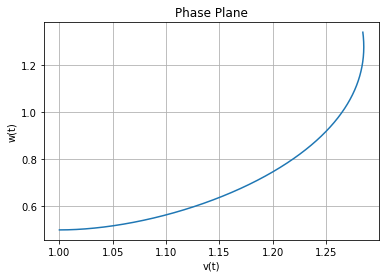

In [3]:
# YOUR CODE HERE
def f(x, u):
    return numpy.array([u[1], u[2], x**2 * u[0] * u[2] - u[0] * u[4], u[4], x * u[3] * u[4] + 4 * u[1]]) 

def jacobian(t, u):
  J = numpy.array([[0, 1, 0, 0, 0], 
                   [0, 0, 1, 0, 0],
                   [t**2 * u[2] - u[4], 0, t**2 * u[0], 0, -1 * u[0]], 
                   [0, 0, 0, 0, 1], 
                   [0, 4, 0, t*u[4], t*u[3]]])
  return J

t = numpy.linspace(0, 1, 1000)
delta_t = t[1] - t[0]
u = numpy.empty((t.shape[0], 5))
u[0, :] = [1, 1/4, 1/3, 1/2, 0]

u[1, :] = u[0] + 0.5 * delta_t * f(t[0], u[0])
u[1, :] = u[0] + delta_t * f(t[0], u[1])

u[2, :] = u[1] + 0.5 * delta_t * f(t[1], u[1])
u[2, :] = u[1] + delta_t * f(t[1], u[2])

for n in range(len(t[3:])):

  b = u[n + 2] + (1/24) * delta_t * (numpy.dot(jacobian(t[n], u[n]), u[n]) - 5 * numpy.dot(jacobian(t[n + 1], u[n + 1]), u[n + 1]) + 19 * numpy.dot(jacobian(t[n + 2], u[n + 2]), u[n + 2]))
  Jf = jacobian(t[n + 2], u[n + 2])
  A = numpy.identity(Jf.shape[0]) - ((9/24) * delta_t * Jf)
  u[n + 3] = numpy.linalg.solve(A, b)
  
v = u[:, 0]
w = u[:, 3]
plt.plot(v, w)
plt.xlabel("v(t)")
plt.ylabel("w(t)")
plt.title("Phase Plane")
plt.grid()
plt.show()
# raise NotImplementedError()

**(e)** (5) Comment on what you observe from parts (b) and (d).  Try increasing the $t_f$ or changing the number of times steps you take (or shrink $\Delta t$).  Explain why you might see this behavior.

YOUR ANSWER HERE

I think the results from part B and part D are pretty similar, although the graph in part D is more curved. When the number of steps changes, the smoothness of the graph is affected (less smooth for less steps). This behavior is expected, as increasing $t$ increases the accuracy and smoothness of our approximation. There is pretty weird behavior for $t_f > 1$, as the curve begins to curve in on itself and self-intersect. 

## Question 2 - Lipschitz Constants

The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$||f(x, u) - f(x, u^*)|| \leq L ||u - u^*||.$$

The Lipschitz constant is useful for describing how much $f(x, u)$ changes if we change $u$.  This in turn then describes how much the slope of the solution $u'$ changes if $u$ is changed since $u' = f$.    

Now consider the system of ODEs

\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

For the system of equations above find the Lipschitz constant if we use the $\ell_2$ norm which is defined as

$$|| v ||_{2} = \left (\sum^n_{i=1} v_i^2 \right )^{1/2}.$$

Note that the Lipschitz constant $L$ also provides an estimate to how long (or how much) we can trust the linearization given by the Jacobian $J$ in the last question.

YOUR ANSWER HERE

We start with
$$
    u = \begin{bmatrix}
    u_1 \\
    u_2
    \end{bmatrix}
$$

We can find $u'$
$$
    u' = \begin{bmatrix}
    u_1' \\
    u_2'
    \end{bmatrix} = \begin{bmatrix}
    3u_1 + 4u_2 \\
    5u_1  - 6u_2
    \end{bmatrix}
$$

We know $u' = f$ so we have:
$$
    ||f(x, u) - f(x, u*) || = 
    || \begin{bmatrix} 
    3u_1 + 4u_2 \\ 
    5u_1 - 6u_2 
    \end{bmatrix} - 
    \begin{bmatrix} 
    3u^*_1 + 4u^*_2 \\ 
    5u^*_1 - 6u^*_2 
    \end{bmatrix} || 
$$

We can write the inequality
$$
    || \begin{bmatrix} 
    3(u_1 - u^*_1) + 4(u_2 - u^*_2) \\
    5(u_1 - u^*_1) - 6(u_2 - u^*_2)
    \end{bmatrix} || \leq L||u - u^*|| \\
    || \begin{bmatrix} 
    3(u_1 - u^*_1) + 4(u_2 - u^*_2) \\
    5(u_1 - u^*_1) - 6(u_2 - u^*_2)
    \end{bmatrix} || 
    \leq L 
    || \begin{bmatrix}
    u_1 - u^*_1 \\
    u_2 - u^*_2
    \end{bmatrix} ||
$$

If we rewrite $u - u^* = \Delta u$, we have:
$$
    \sqrt{(3\Delta u_1 + 4\Delta u_2)^2 +  (5\Delta u_1 - 6\Delta u_2)^2} \leq L \sqrt{\Delta u_1 ^2 + \Delta u_2 ^2} \\
    \sqrt{9\Delta u_1^2 + 16\Delta u_2 ^2 + 24 \Delta u_1 \Delta u_2 +  25\Delta u_1^2 + 36\Delta u_2 ^2 - 60 \Delta u_1 \Delta u_2} \leq L \sqrt{\Delta u_1 ^2 + \Delta u_2 ^2} \\
    \sqrt{36\Delta u_1^2 + 52\Delta u_2 ^2 - 36 \Delta u_1 \Delta u_2} \leq L \sqrt{\Delta u_1 ^2 + \Delta u_2 ^2} \\
    \sqrt{36\Delta u_1^2 + 52\Delta u_2 ^2 - 36 \Delta u_1 \Delta u_2} \leq  \sqrt{L^2 \Delta u_1 ^2 + L^2 \Delta u_2 ^2}
$$

For this inequality to be true, we know
$$
    L^2 \geq 36 \\
    L^2 \geq 52
$$
must both be true. We end up with the limit for the Lipschitz Constant as:
$$ L = \sqrt{52} $$
so we know L is bounded by $\sqrt{52}$.

## Question 3 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**(a)** (5) Reformulate the problem as an initial value problem for a system of first-order differential equations.

YOUR ANSWER HERE

We have 
$$
    \vec{u} = \begin{bmatrix}
    x \\
    x' \\
    y \\
    y' 
\end{bmatrix} = \begin{bmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4 
\end{bmatrix} 
$$

We can write $u'$ as:
$$
    u' = \begin{bmatrix}
    x' \\
    x'' \\
    y' \\
    y'' 
\end{bmatrix} = \begin{bmatrix}
    u_2 \\
    - \frac{u_1}{r^3} \\
    u_4 \\
    - \frac{u_3}{r^3} \\ 
\end{bmatrix} 
$$

This gives us a system of first-order differential equations, in terms of $u$. We can write the initial value of $u$ as:
$$
    u(0) = \begin{bmatrix}
    1 - e \\
    0 \\
    0 \\
    \sqrt{\frac{1 + e}{1 - e}}    
\end{bmatrix}
$$

**(b)** (5) Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [4]:
def solve_orbit_RK2(t, e):
    # YOUR CODE HERE
    # raise NotImplementedError()

    def f(u):
      r = numpy.sqrt(u[0]**2 + u[2]**2)
      return numpy.array([u[1], -1 * u[0] / r**3, u[3], -1 * u[2] / r**3])

    delta_t = t[1] - t[0]
    u_2 = numpy.empty((t.shape[0], 4))
    u_2[0, :] = [1 - e, 0, 0, numpy.sqrt((1 + e) / (1 - e))]

    for (n, t_n) in enumerate(t[1:]):
      u_2[n + 1, :] = u_2[n, :] + 0.5 * delta_t * f(u_2[n, :])
      u_2[n + 1, :] = u_2[n, :] + delta_t * f(u_2[n+1, :])

    x = u_2[:, 0]
    y = u_2[:, 2]

    return x, y

In [5]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


**(c)** (5) Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

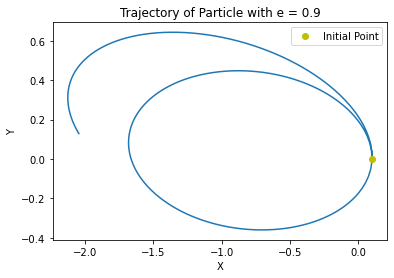

In [6]:
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9
# YOUR CODE HERE

x, y = solve_orbit_RK2(t, e)
plt.plot(x, y)
plt.plot(x[0], y[0], "yo", label="Initial Point")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trajectory of Particle with e = 0.9")
plt.show()

# raise NotImplementedError()

## Question 4 - Absolute Stability Regions and Order Stars

**(a)** (15) Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

The interior value of the Taylor Series of Order 2 is 0.5
The exterior value of the Taylor Series of Order 2 is 5.0
The interior value of the Taylor Series of Order 3 is 0.33333333333333337
The exterior value of the Taylor Series of Order 3 is 5.666666666666666
The interior value of the Taylor Series of Order 4 is 0.37500000000000006
The exterior value of the Taylor Series of Order 4 is 5.0
The interior value of the Taylor Series of Order 5 is 0.3666666666666667
The exterior value of the Taylor Series of Order 5 is 3.533333333333333


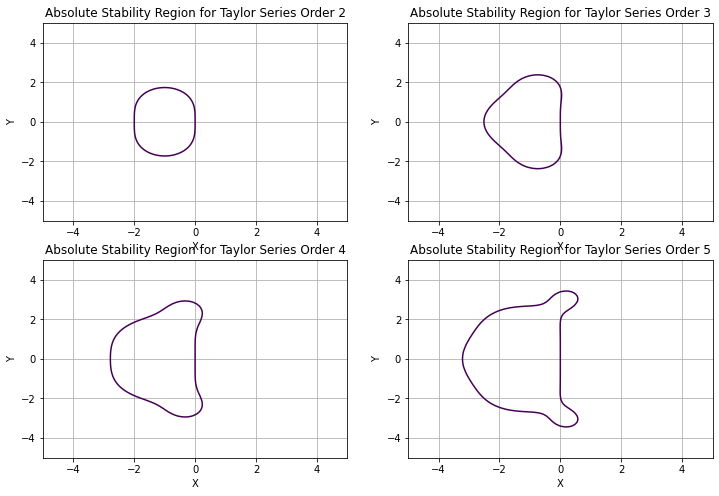

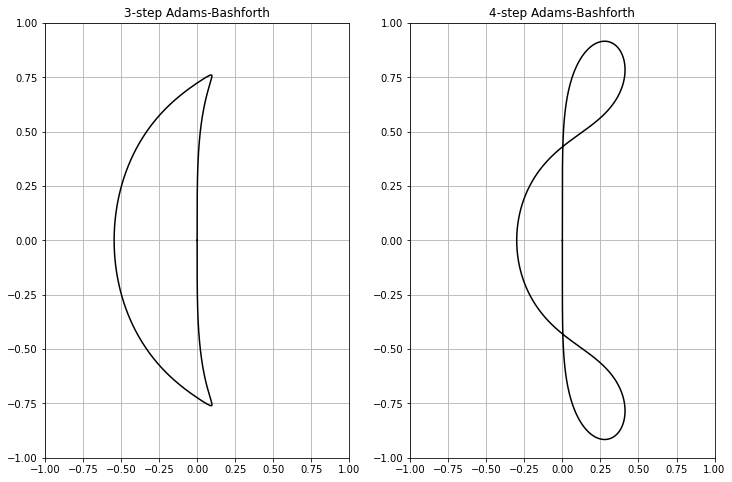

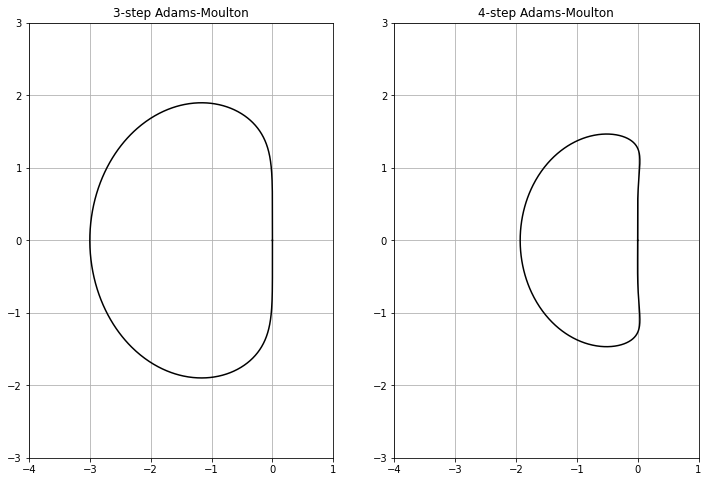

In [7]:
from ast import Yield
# YOUR CODE HERE

# NUMBER 1 -- Taylor Series for order 2-5

x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)

X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

tay2 = lambda z: 1 + z + (z ** 2)/2
tay3 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6
tay4 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6 + (z**4)/24
tay5 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6 + (z**4)/24 + (z**5)/120

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)

axes = fig.add_subplot(2, 2, 1)
axes.contour(X, Y, numpy.abs(tay2(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Absolute Stability Region for Taylor Series Order 2")

print("The interior value of the Taylor Series of Order 2 is", numpy.abs(tay2(-1 + 1j * 0)))
print("The exterior value of the Taylor Series of Order 2 is", numpy.abs(tay2(-4 + 1j * 0)))

axes = fig.add_subplot(2, 2, 2)
axes.contour(X, Y, numpy.abs(tay3(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Absolute Stability Region for Taylor Series Order 3")

print("The interior value of the Taylor Series of Order 3 is", numpy.abs(tay3(-1 + 1j * 0)))
print("The exterior value of the Taylor Series of Order 3 is", numpy.abs(tay3(-4 + 1j * 0)))

axes = fig.add_subplot(2, 2, 3)
axes.contour(X, Y, numpy.abs(tay4(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Absolute Stability Region for Taylor Series Order 4")

print("The interior value of the Taylor Series of Order 4 is", numpy.abs(tay4(-1 + 1j * 0)))
print("The exterior value of the Taylor Series of Order 4 is", numpy.abs(tay4(-4 + 1j * 0)))

axes = fig.add_subplot(2, 2, 4)
axes.contour(X, Y, numpy.abs(tay5(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Absolute Stability Region for Taylor Series Order 5")

print("The interior value of the Taylor Series of Order 5 is", numpy.abs(tay5(-1 + 1j * 0)))
print("The exterior value of the Taylor Series of Order 5 is", numpy.abs(tay5(-4 + 1j * 0)))

# NUMBER 2 -- 3 and 4 step Adam-Bashforth Method

theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

# 3 Steps
rho_3AB = lambda xi: (xi - 1) * xi**2
sigma_3AB = lambda xi: ((23 * xi - 16) * xi + 5) / 12
z_3AB = lambda xi: rho_3AB(xi) / sigma_3AB(xi) 

# 4 Steps
rho_4AB = lambda xi: (xi - 1) * xi**3
sigma_4AB = lambda xi: (((55 * xi - 59) * xi + 37) * xi - 9) / 24
z_4AB = lambda xi: rho_4AB(xi) / sigma_4AB(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AB(xi).real, z_3AB(xi).imag, 'k')
axes.set_title("3-step Adams-Bashforth")
axes.grid()
axes.set_xlim([-1, 1])
axes.set_ylim([-1, 1])

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AB(xi).real, z_4AB(xi).imag, 'k')
axes.set_title("4-step Adams-Bashforth")
axes.grid()
axes.set_xlim([-1, 1])
axes.set_ylim([-1, 1])
plt.show()

# NUMBER 3 -- 3 and 4 step Adam-Moulton Method
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

# 3 steps
rho_3AM = lambda xi: (xi - 1) * xi**2
sigma_3AM = lambda xi: (((9 * xi + 19) * xi - 5) * xi + 1) / 24
z_3AM = lambda xi: rho_3AM(xi) / sigma_3AM(xi) 

# 4 steps
rho_4AM = lambda xi: (xi - 1) * xi**3
sigma_4AM = lambda xi: ((((251 * xi + 646) * xi - 264) * xi + 106) - 19) * xi / 720
z_4AM = lambda xi: rho_4AM(xi) / sigma_4AM(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AM(xi).real, z_3AM(xi).imag, 'k')
axes.set_title("3-step Adams-Moulton")
axes.set_xlim([-4, 1])
axes.set_ylim([-3, 3])
axes.grid()

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AM(xi).real, z_4AM(xi).imag, 'k')
axes.set_title("4-step Adams-Moulton")
axes.set_xlim([-4, 1])
axes.set_ylim([-3, 3])
axes.grid()
plt.show()

# raise NotImplementedError()

**(b)** (15) The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

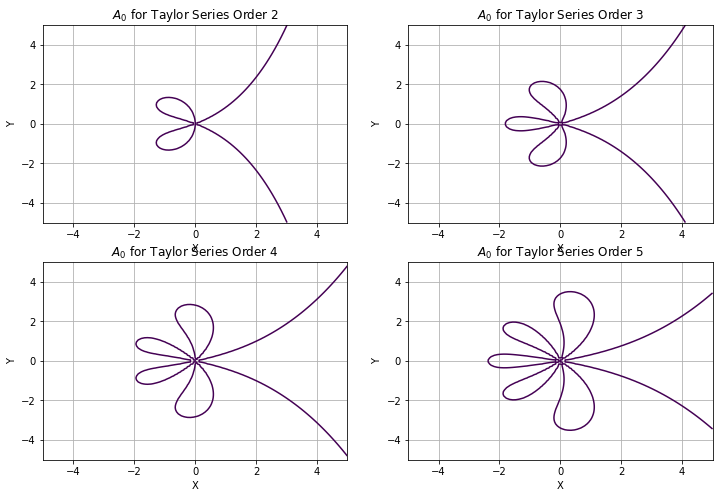

In [8]:
# YOUR CODE HERE

x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)

X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

tay2 = lambda z: 1 + z + (z ** 2)/2
tay3 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6
tay4 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6 + (z**4)/24
tay5 = lambda z: 1 + z + (z ** 2)/2 + (z**3)/6 + (z**4)/24 + (z**5)/120

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)

axes = fig.add_subplot(2, 2, 1)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * tay2(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("$A_0$ for Taylor Series Order 2")

axes = fig.add_subplot(2, 2, 2)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * tay3(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("$A_0$ for Taylor Series Order 3")

axes = fig.add_subplot(2, 2, 3)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * tay4(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("$A_0$ for Taylor Series Order 4")

axes = fig.add_subplot(2, 2, 4)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * tay5(Z)), levels=[1])
axes.grid()
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("$A_0$ for Taylor Series Order 5")

plt.show()
# raise NotImplementedError()

The number of "fingers" is equal to the order of the Taylor Series method, which can be easily seen in the plots above.

## Question 5 - SciPy Integrate

Consider the decay process
$$
    A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C \overset{K_3}{\rightarrow} D
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}A}{\text{d}t} &= -K_1 A \\
    \frac{\text{d}B}{\text{d}t} &= K_1 A - K_2 B \\
    \frac{\text{d}C}{\text{d}t} &= K_2 B - K_3 C \\
    \frac{\text{d}D}{\text{d}t} &= K_3 C \\
\end{align*}

**(a)** (10) Write a function that uses `scipy.integrate` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "dopri5"), and the reaction rates $K_1$, $K_2$, and $K_3$.

In [9]:
import scipy.integrate as integrate

def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    # YOUR CODE HERE
    # raise NotImplementedError()    

    def f(t, u):
      return numpy.array([-K_1*u[0], K_1*u[0]-K_2*u[1], K_2*u[1]-K_3*u[2], K_3*u[2]])

    u = numpy.empty((numpy.size(t), 4))
    u[0, :] = u_0

    integrator = integrate.ode(f)
    integrator.set_integrator(solver_type)
    integrator.set_initial_value(u[0, :])
    
    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        u[n + 1, :] = integrator.y

    U = u

    return U

In [10]:
t = numpy.linspace(0.0, 10.0, 10)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)
U_sol = numpy.array([[1.0000000000000000e+00, 0.0000000000000000e+00,
                      0.0000000000000000e+00, 0.0000000000000000e+00],
                     [3.2919298826277271e-01, 2.2082495381343401e-01,
                      1.4813096181267352e-01, 3.0185109611111993e-01],
                     [1.0836802654276900e-01, 9.6624368667878130e-02,
                      8.6153390524786266e-02, 7.0885421426456674e-01],
                     [3.5673996630001523e-02, 3.4401353001617396e-02,
                      3.3174114479337484e-02, 8.9675053588904374e-01],
                     [1.1743631968628626e-02, 1.1605715517361529e-02,
                      1.1469419325266718e-02, 9.6518123318874338e-01],
                     [3.8659219913406520e-03, 3.8509760174843801e-03,
                      3.8360878593115726e-03, 9.8844701413186375e-01],
                     [1.2726346009991362e-03, 1.2710149139283067e-03,
                      1.2693972897971615e-03, 9.9618695319527573e-01],
                     [4.1894244902209761e-04, 4.1876692442412833e-04,
                      4.1859147343448249e-04, 9.9874369915311978e-01],
                     [1.3791293652887476e-04, 1.3789391503107924e-04,
                      1.3787489615970831e-04, 9.9958631825228084e-01],
                     [4.5399978275093905e-05, 4.5397916926305302e-05,
                      4.5395855671230534e-05, 9.9986380624912774e-01]])
numpy.testing.assert_allclose(U, U_sol)
print("Success!")

Success!
